# webscraping

## play by play data from bball ref

In [58]:
import pandas as pd
import requests, bs4, re
from bs4 import BeautifulSoup as bs
from time import sleep

### Get links of play-by-play pages of all games of a season

In [119]:
#defining function to flatten scraped data


#each final row: awaylayupattmp, awaylongtwoattmpt, awaythreeattmp, awaydistance, awaymake, awayassist, awayft, awaydr, awayor
#                 homelayupattmp, homelongtwoattmp, homethreeattmp, homedistance, homemake, homeassist, homeft, homedr, homeor
def flatten(trs):
    rows = []
    index=[1,5]
    myregex = re.compile('(\d+) ft')

    for tr in trs[3:]:

        tds=tr.find_all('td')
        row = [td.text for td in tds]
        if len(row) != 6:
            continue
        slicedrow=[row[i] for i in index]

        finalrow={'awaylayupattmp':0, 'awaylongtwoattmp':0, 'awaythreeattmp':0, 'awaydistance':0, 'awaymake':0, 'awayassist':0, 'awayft':0, 'awaydr':0, 'awayor':0, 
              'homelayupattmp':0, 'homelongtwoattmp':0, 'homethreeattmp':0, 'homedistance':0, 'homemake':0, 'homeassist':0, 'homeft':0, 'homedr':0, 'homeor':0}


        #away team fg
        if '-pt ' in slicedrow[0]:
            if ' ft' in slicedrow[0]:
                finalrow['awaydistance']=myregex.findall(slicedrow[0])[0]
            if ' rim' in slicedrow[0]:
                finalrow['awaydistance']=0
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1
                if 'assist ' in slicedrow[0]:
                    finalrow['awayassist']=1
            if (' 2-pt layup ' in slicedrow[0]) or (' 2-pt dunk ' in slicedrow[0]):
                finalrow['awaylayupattmp']=1
            if (' 2-pt ' in slicedrow[0]) and (' shot ' in slicedrow[0]):
                finalrow['awaylongtwoattmp']=1
            if (' 3-pt ' in slicedrow[0]):
                finalrow['awaythreeattmp']=1

        #away team ft
        elif ' free throw ' in slicedrow[0]:
            finalrow['awayft']=1
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1

        #away team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awaydr']=1
        elif ("Offensive rebound " in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awayor']=1    

        #home team fg
        elif '-pt ' in slicedrow[1]:
            if ' ft' in slicedrow[1]:
                finalrow['homedistance']=myregex.findall(slicedrow[1])[0]
            if ' rim' in slicedrow[1]:
                finalrow['homedistance']=0
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1
                if 'assist ' in slicedrow[1]:
                    finalrow['homeassist']=1
            if (' 2-pt layup ' in slicedrow[1]) or (' 2-pt dunk ' in slicedrow[1]):
                finalrow['homelayupattmp']=1
            if (' 2-pt ' in slicedrow[1]) and (' shot ' in slicedrow[1]):
                finalrow['homelongtwoattmp']=1
            if (' 3-pt ' in slicedrow[1]):
                finalrow['homethreeattmp']=1                    

        #home team ft
        elif ' free throw ' in slicedrow[1]:
            finalrow['homeft']=1
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1            

        #home team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homedr']=1
        elif ("Offensive rebound " in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homeor']=1                



        else:
            continue
        #print(True)
        rows.append(finalrow)
    return rows

In [61]:
#Yearlinks=[]
finaldict={}
for year in range(1998,2023):
    print(year)
    finaldict[year]=[]
    sleep(3.5)
    url = 'https://www.basketball-reference.com/leagues/NBA_'+str(year)+'_games.html'
    #Yearlinks.append(year)
    response = requests.get(url)
    status = response.status_code
    if status == 200:
      page = response.text
      soup = bs(page)
    else:
      print(f"Oops! Received status code {status}")
    
    monthdiv=soup.find('div', class_='filter')
    months=monthdiv.find_all('a')
    monthlinks=[]
    for month in months:
        link='https://www.basketball-reference.com/'+month['href']
        monthlinks.append(link)
    
    gamelinks=[]
    for link in monthlinks:
        print(link)
        url = link
        response = requests.get(url)
        status = response.status_code
        if status == 200:
          page = response.text
          soup = bs(page)
        else:
          print(f"Oops! Received status code {status}")

        table=soup.find('table', id='schedule')
        games=table.find_all('a', href=True, text='Box Score')
        for game in games:
            link='https://www.basketball-reference.com/boxscores/pbp/'+game['href'][11:]
            gamelinks.append(link)
            gameattemptdistances=shotdist(link)
            finaldict[year]=finaldict[year]+gameattemptdistances

1998
https://www.basketball-reference.com//leagues/NBA_1998_games-october.html
https://www.basketball-reference.com//leagues/NBA_1998_games-november.html
https://www.basketball-reference.com//leagues/NBA_1998_games-december.html
https://www.basketball-reference.com//leagues/NBA_1998_games-january.html
https://www.basketball-reference.com//leagues/NBA_1998_games-february.html
https://www.basketball-reference.com//leagues/NBA_1998_games-march.html
https://www.basketball-reference.com//leagues/NBA_1998_games-april.html
https://www.basketball-reference.com//leagues/NBA_1998_games-may.html
https://www.basketball-reference.com//leagues/NBA_1998_games-june.html
1999
https://www.basketball-reference.com//leagues/NBA_1999_games-february.html
https://www.basketball-reference.com//leagues/NBA_1999_games-march.html
https://www.basketball-reference.com//leagues/NBA_1999_games-april.html
https://www.basketball-reference.com//leagues/NBA_1999_games-may.html
https://www.basketball-reference.com//leagu

In [62]:
#save object as .pickle
import pickle

with open('shotlocation.pickle', 'wb') as handle:
    pickle.dump(finaldict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#pickle file can be read via pandas
finaldict = pd.read_pickle(r'shotlocation.pickle')

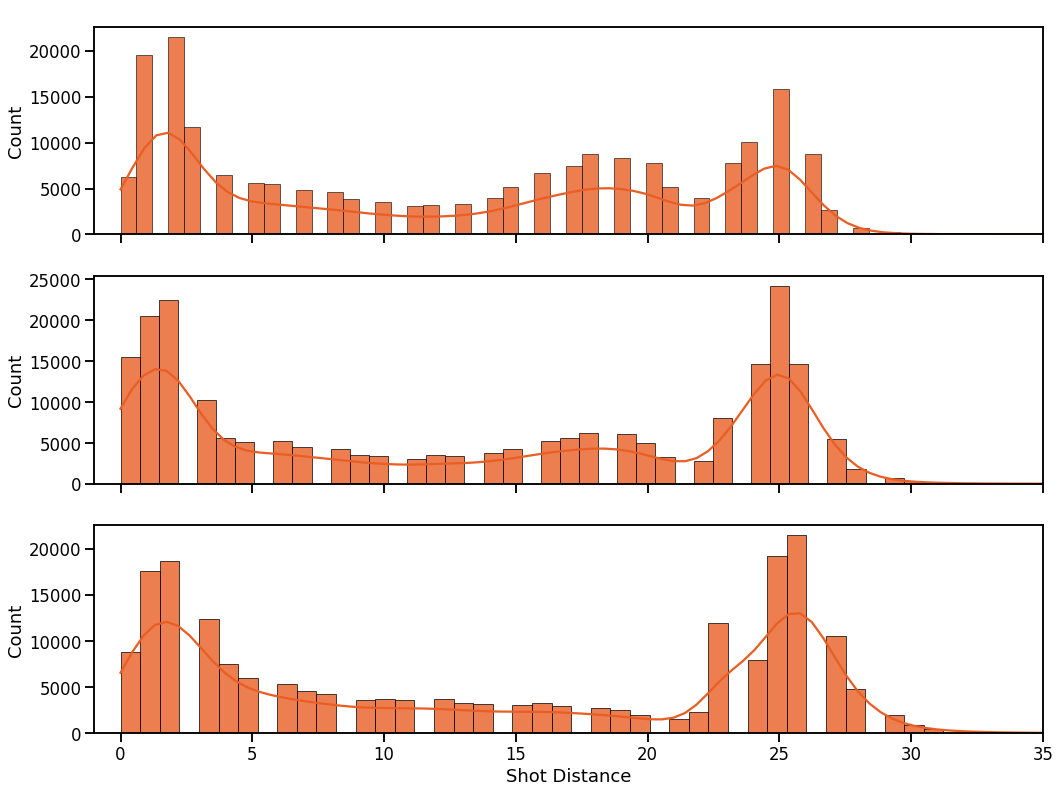

In [11]:
#plt.figure(figsize = (12,8))

#params = {"ytick.color" : "w",
          #"xtick.color" : "w",
          #"axes.labelcolor" : "w",
          #"axes.edgecolor" : "w"}
#plt.rcParams.update(params) #changes text color to white

sns.set_context("talk")

fig, axes = plt.subplots(3, 1, figsize=(17, 13), sharex=True)

#sns.histplot(finaldict[2011], ax=axes[0,0])

sns.histplot(finaldict[2011],ax=axes[0],kde=True,color='#e95e24', alpha=0.8)
axes[0].set_title(2011, color='w')

sns.histplot(finaldict[2017],ax=axes[1],kde=True,color='#e95e24', alpha=0.8)
axes[1].set_title(2017, color='w')

sns.histplot(finaldict[2021],ax=axes[2],kde=True,color='#e95e24', alpha=0.8)
axes[2].set_title(2021, color='w')

axes[0].set_xlim([-1, 35])
axes[2].set_xlabel("Shot Distance")

fig.patch.set_facecolor('white') #set color around plot to be white

fig.figure.savefig("shotlocation.png",
                      bbox_inches="tight"); #avoid cutting off labels
                    #transparent=True,

In [ ]:
f, axes = plt.subplots(1, 2)

In [68]:
len(finaldict)

25

In [11]:
url = 'https://www.basketball-reference.com/leagues/NBA_2009_games.html'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup = bs(page)
else:
  print(f"Oops! Received status code {status}")

In [12]:
monthdiv=soup.find('div', class_='filter')

In [13]:
months=monthdiv.find_all('a')

In [14]:
monthlinks=[]
for month in months:
    link='https://www.basketball-reference.com/'+month['href']
    monthlinks.append(link)

monthlinks

['https://www.basketball-reference.com//leagues/NBA_2009_games-october.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-november.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-december.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-january.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-february.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-march.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-april.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-may.html',
 'https://www.basketball-reference.com//leagues/NBA_2009_games-june.html']

In [15]:
gamelinks=[]
for link in monthlinks:
    
    url = link
    response = requests.get(url)
    status = response.status_code
    if status == 200:
      page = response.text
      soup = bs(page)
    else:
      print(f"Oops! Received status code {status}")
    
    table=soup.find('table', id='schedule')
    games=table.find_all('a', href=True, text='Box Score')
    for game in games:
        link='https://www.basketball-reference.com/boxscores/pbp/'+game['href'][11:]
        gamelinks.append(link)
        

In [16]:
#looks like the links contain both regular season and playoff
gamelinks[-5:]

['https://www.basketball-reference.com/boxscores/pbp/200906040LAL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906070LAL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906090ORL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906110ORL.html',
 'https://www.basketball-reference.com/boxscores/pbp/200906140ORL.html']

### Get stats from every game of the season

In [20]:
#defining function to flatten scraped data


#each final row: awaylayupattmp, awaylongtwoattmpt, awaythreeattmp, awaydistance, awaymake, awayassist, awayft, awaydr, awayor
#                 homelayupattmp, homelongtwoattmp, homethreeattmp, homedistance, homemake, homeassist, homeft, homedr, homeor
def flatten(trs):
    rows = []
    index=[1,5]
    myregex = re.compile('(\d+) ft')

    for tr in trs[3:]:

        tds=tr.find_all('td')
        row = [td.text for td in tds]
        if len(row) != 6:
            continue
        slicedrow=[row[i] for i in index]

        finalrow={'awaylayupattmp':0, 'awaylongtwoattmp':0, 'awaythreeattmp':0, 'awaydistance':0, 'awaymake':0, 'awayassist':0, 'awayft':0, 'awaydr':0, 'awayor':0, 
              'homelayupattmp':0, 'homelongtwoattmp':0, 'homethreeattmp':0, 'homedistance':0, 'homemake':0, 'homeassist':0, 'homeft':0, 'homedr':0, 'homeor':0}


        #away team fg
        if '-pt ' in slicedrow[0]:
            if ' ft' in slicedrow[0]:
                finalrow['awaydistance']=myregex.findall(slicedrow[0])[0]
            if ' rim' in slicedrow[0]:
                finalrow['awaydistance']=0
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1
                if 'assist ' in slicedrow[0]:
                    finalrow['awayassist']=1
            if (' 2-pt layup ' in slicedrow[0]) or (' 2-pt dunk ' in slicedrow[0]):
                finalrow['awaylayupattmp']=1
            if (' 2-pt ' in slicedrow[0]) and (' shot ' in slicedrow[0]):
                finalrow['awaylongtwoattmp']=1
            if (' 3-pt ' in slicedrow[0]):
                finalrow['awaythreeattmp']=1

        #away team ft
        elif ' free throw ' in slicedrow[0]:
            finalrow['awayft']=1
            if " makes " in slicedrow[0]:
                finalrow['awaymake']=1

        #away team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awaydr']=1
        elif ("Offensive rebound " in slicedrow[0]) and (' by Team' not in slicedrow[0]):
            finalrow['awayor']=1    

        #home team fg
        elif '-pt ' in slicedrow[1]:
            if ' ft' in slicedrow[1]:
                finalrow['homedistance']=myregex.findall(slicedrow[1])[0]
            if ' rim' in slicedrow[1]:
                finalrow['homedistance']=0
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1
                if 'assist ' in slicedrow[1]:
                    finalrow['homeassist']=1
            if (' 2-pt layup ' in slicedrow[1]) or (' 2-pt dunk ' in slicedrow[1]):
                finalrow['homelayupattmp']=1
            if (' 2-pt ' in slicedrow[1]) and (' shot ' in slicedrow[1]):
                finalrow['homelongtwoattmp']=1
            if (' 3-pt ' in slicedrow[1]):
                finalrow['homethreeattmp']=1                    

        #home team ft
        elif ' free throw ' in slicedrow[1]:
            finalrow['homeft']=1
            if " makes " in slicedrow[1]:
                finalrow['homemake']=1            

        #home team rebound (not counting team rebound)
        elif ('Defensive rebound ' in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homedr']=1
        elif ("Offensive rebound " in slicedrow[1]) and (' by Team' not in slicedrow[1]):
            finalrow['homeor']=1                

            
        else:
            continue
        #print(True)
        rows.append(finalrow)
    return rows

In [57]:
#defining function for turning scraped dict into list of shot distance
def shotdist(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
      page = response.text
      soup = bs(page)
    else:
      print(f"Oops! Received status code {status}")

    table=soup.find('table', id='pbp')
    trs=table.find_all('tr')
    rows=flatten(trs)
    df = pd.DataFrame(rows) #turn dict into df
    df=df.astype(int)
    awayattemptdf=df[(df['awaylayupattmp']==1) | (df['awaylongtwoattmp']==1) | (df['awaythreeattmp']==1)] #away team attempt df
    homeattemptdf=df[(df['homelayupattmp']==1) | (df['homelongtwoattmp']==1) | (df['homethreeattmp']==1)] #home team attempt df
    gameattempts=awayattemptdf.awaydistance.tolist()+homeattemptdf.homedistance.tolist() #list of shot attempt distances of a game

    return gameattempts
    